# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/hn/b1kx1ksd7d793jt1cg6709x00000gn/T/ipykernel_8086/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('KSI.csv')

In [4]:
# rows and columns
print(df.shape)

(18194, 57)


In [3]:
print(df.head())

              X             Y   INDEX_    ACCNUM  YEAR  \
0 -8.844611e+06  5.412414e+06  3387730  892658.0  2006   
1 -8.844611e+06  5.412414e+06  3387731  892658.0  2006   
2 -8.816480e+06  5.434843e+06  3388101  892810.0  2006   
3 -8.829728e+06  5.419071e+06  3389067  893184.0  2006   
4 -8.816480e+06  5.434843e+06  3388102  892810.0  2006   

                     DATE  TIME          STREET1         STREET2 OFFSET  ...  \
0  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
1  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
2  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   
3  2006/01/01 05:00:00+00   236     WOODBINE AVE     O CONNOR DR    NaN  ...   
4  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   

  AG_DRIV REDLIGHT  ALCOHOL  DISABILITY  HOOD_158 NEIGHBOURHOOD_158 HOOD_140  \
0     Yes      NaN      NaN         NaN        88   High Park North       88   
1     Yes 

In [4]:
# column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [5]:
# statistical summary (mean, std, min, max, etc.)
print(df.describe())

                  X             Y        INDEX_        ACCNUM          YEAR  \
count  1.819400e+04  1.819400e+04  1.819400e+04  1.326400e+04  18194.000000   
mean  -8.838345e+06  5.420748e+06  3.818870e+07  4.248444e+08   2012.934869   
std    1.162533e+04  8.682160e+03  3.726463e+07  1.065503e+09      4.754258   
min   -8.865305e+06  5.402162e+06  3.363207e+06  2.530100e+04   2006.000000   
25%   -8.846591e+06  5.413242e+06  5.391370e+06  1.021229e+06   2009.000000   
50%   -8.838448e+06  5.419556e+06  7.644612e+06  1.197308e+06   2012.000000   
75%   -8.829671e+06  5.427813e+06  8.078261e+07  1.365020e+06   2017.000000   
max   -8.807929e+06  5.443099e+06  8.170606e+07  4.008024e+09   2022.000000   

               TIME       WARDNUM      LATITUDE     LONGITUDE    FATAL_NO  \
count  18194.000000  1.733200e+04  18194.000000  18194.000000  827.000000   
mean    1362.615917  2.521028e+03     43.710459    -79.396201   29.073761   
std      630.816048  1.844803e+05      0.056369      0.10

In [6]:
# null values
print(df.isnull().sum())

X                        0
Y                        0
INDEX_                   0
ACCNUM                4930
YEAR                     0
DATE                     0
TIME                     0
STREET1                  0
STREET2               1684
OFFSET               14792
ROAD_CLASS             376
DISTRICT               105
WARDNUM                862
LATITUDE                 0
LONGITUDE                0
LOCCOORD                95
ACCLOC                5450
TRAFFCTL                34
VISIBILITY              20
LIGHT                    0
RDSFCOND                25
ACCLASS                  5
IMPACTYPE                4
INVTYPE                 16
INVAGE                   0
INJURY                8567
FATAL_NO             17367
INITDIR               5052
VEHTYPE               3228
MANOEUVER             7660
DRIVACT               8951
DRIVCOND              8954
PEDTYPE              15134
PEDACT               15112
PEDCOND              15110
CYCLISTYPE           17420
CYCACT               17428
C

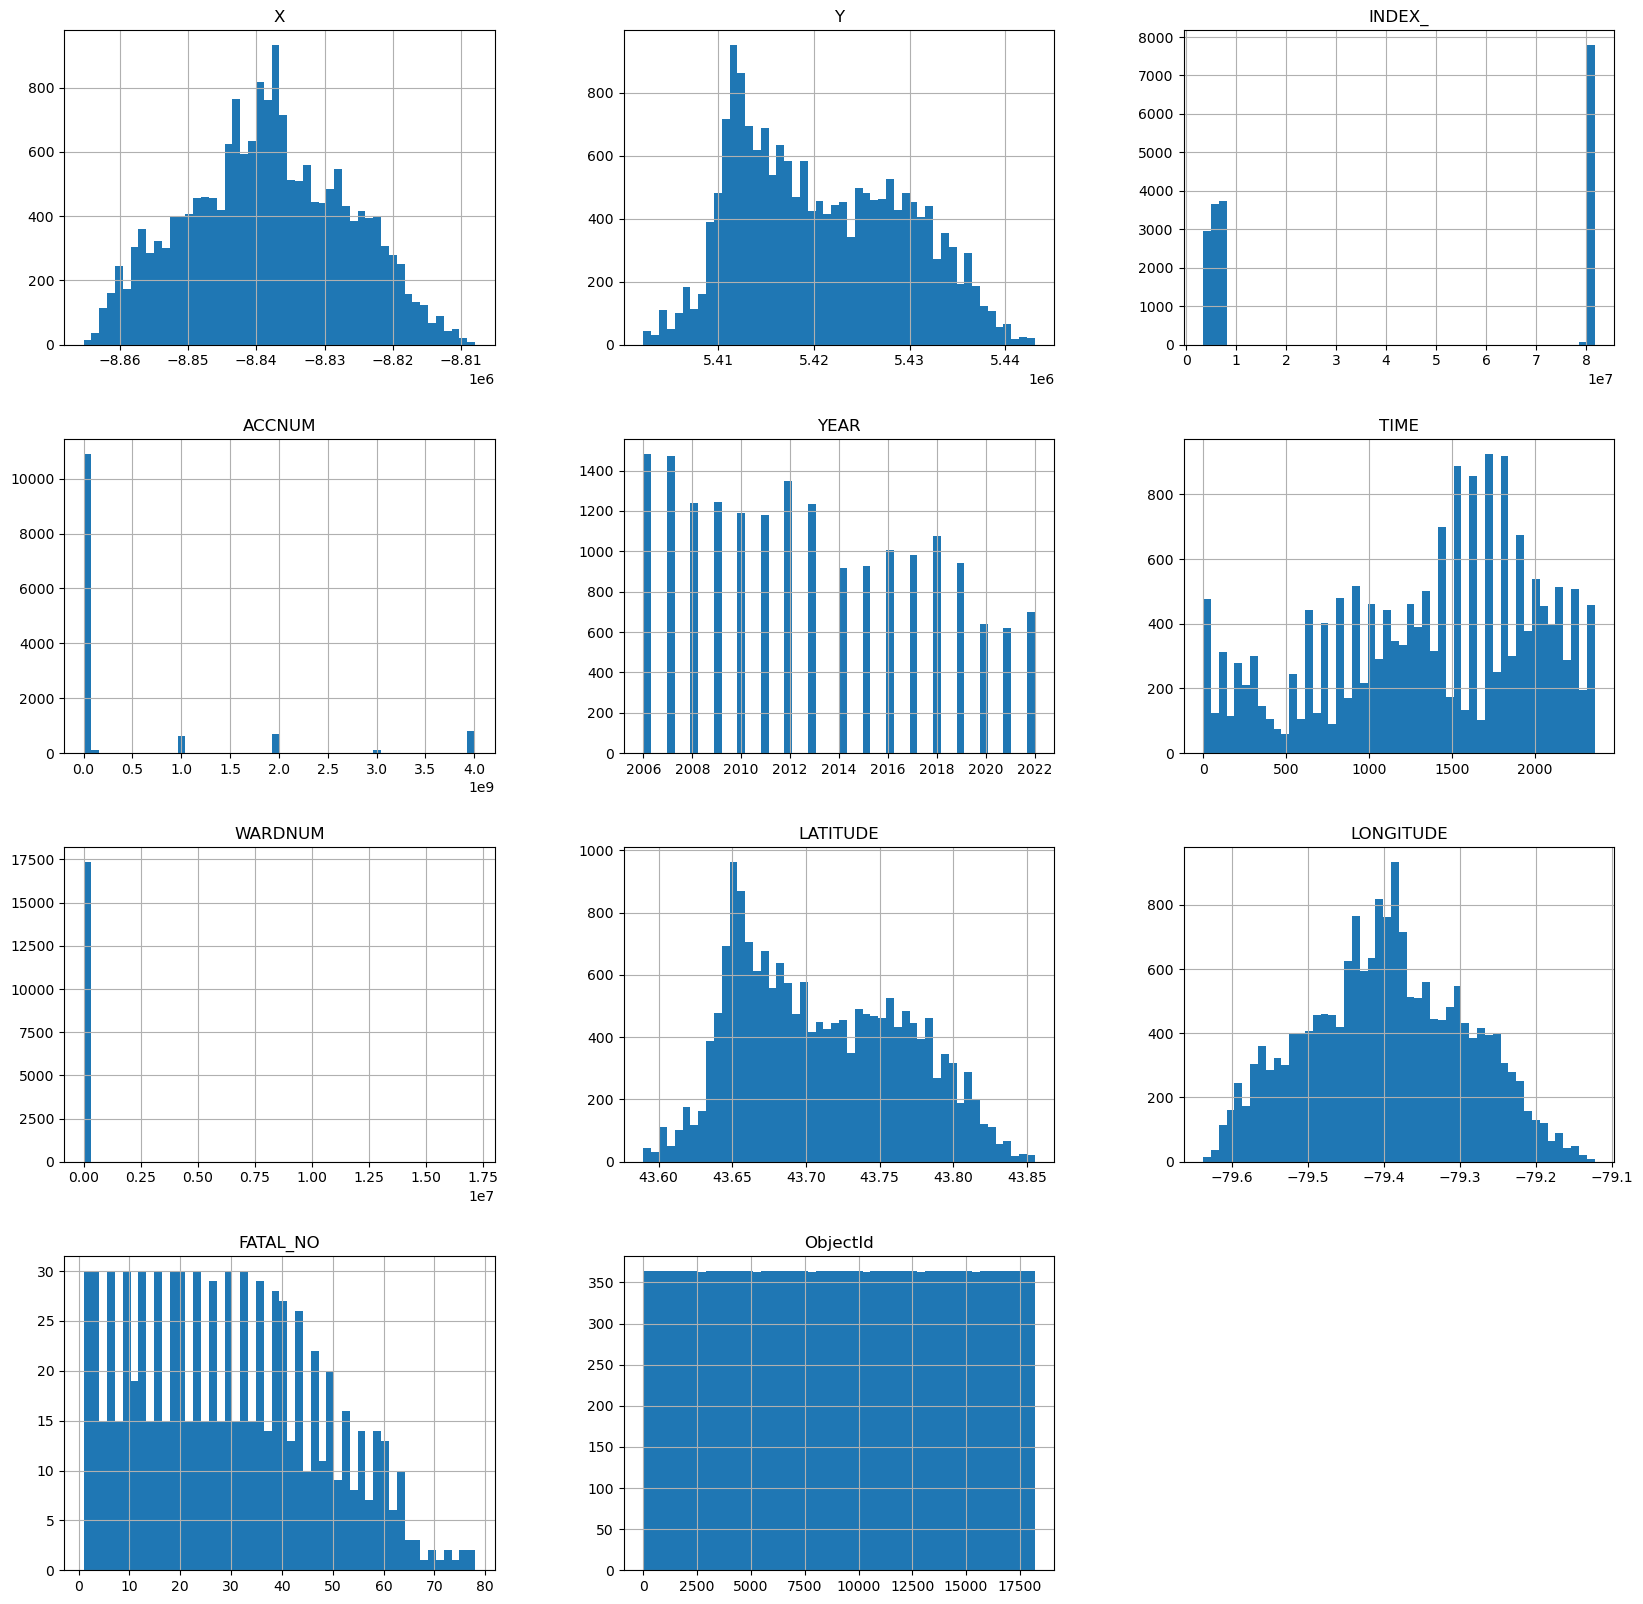

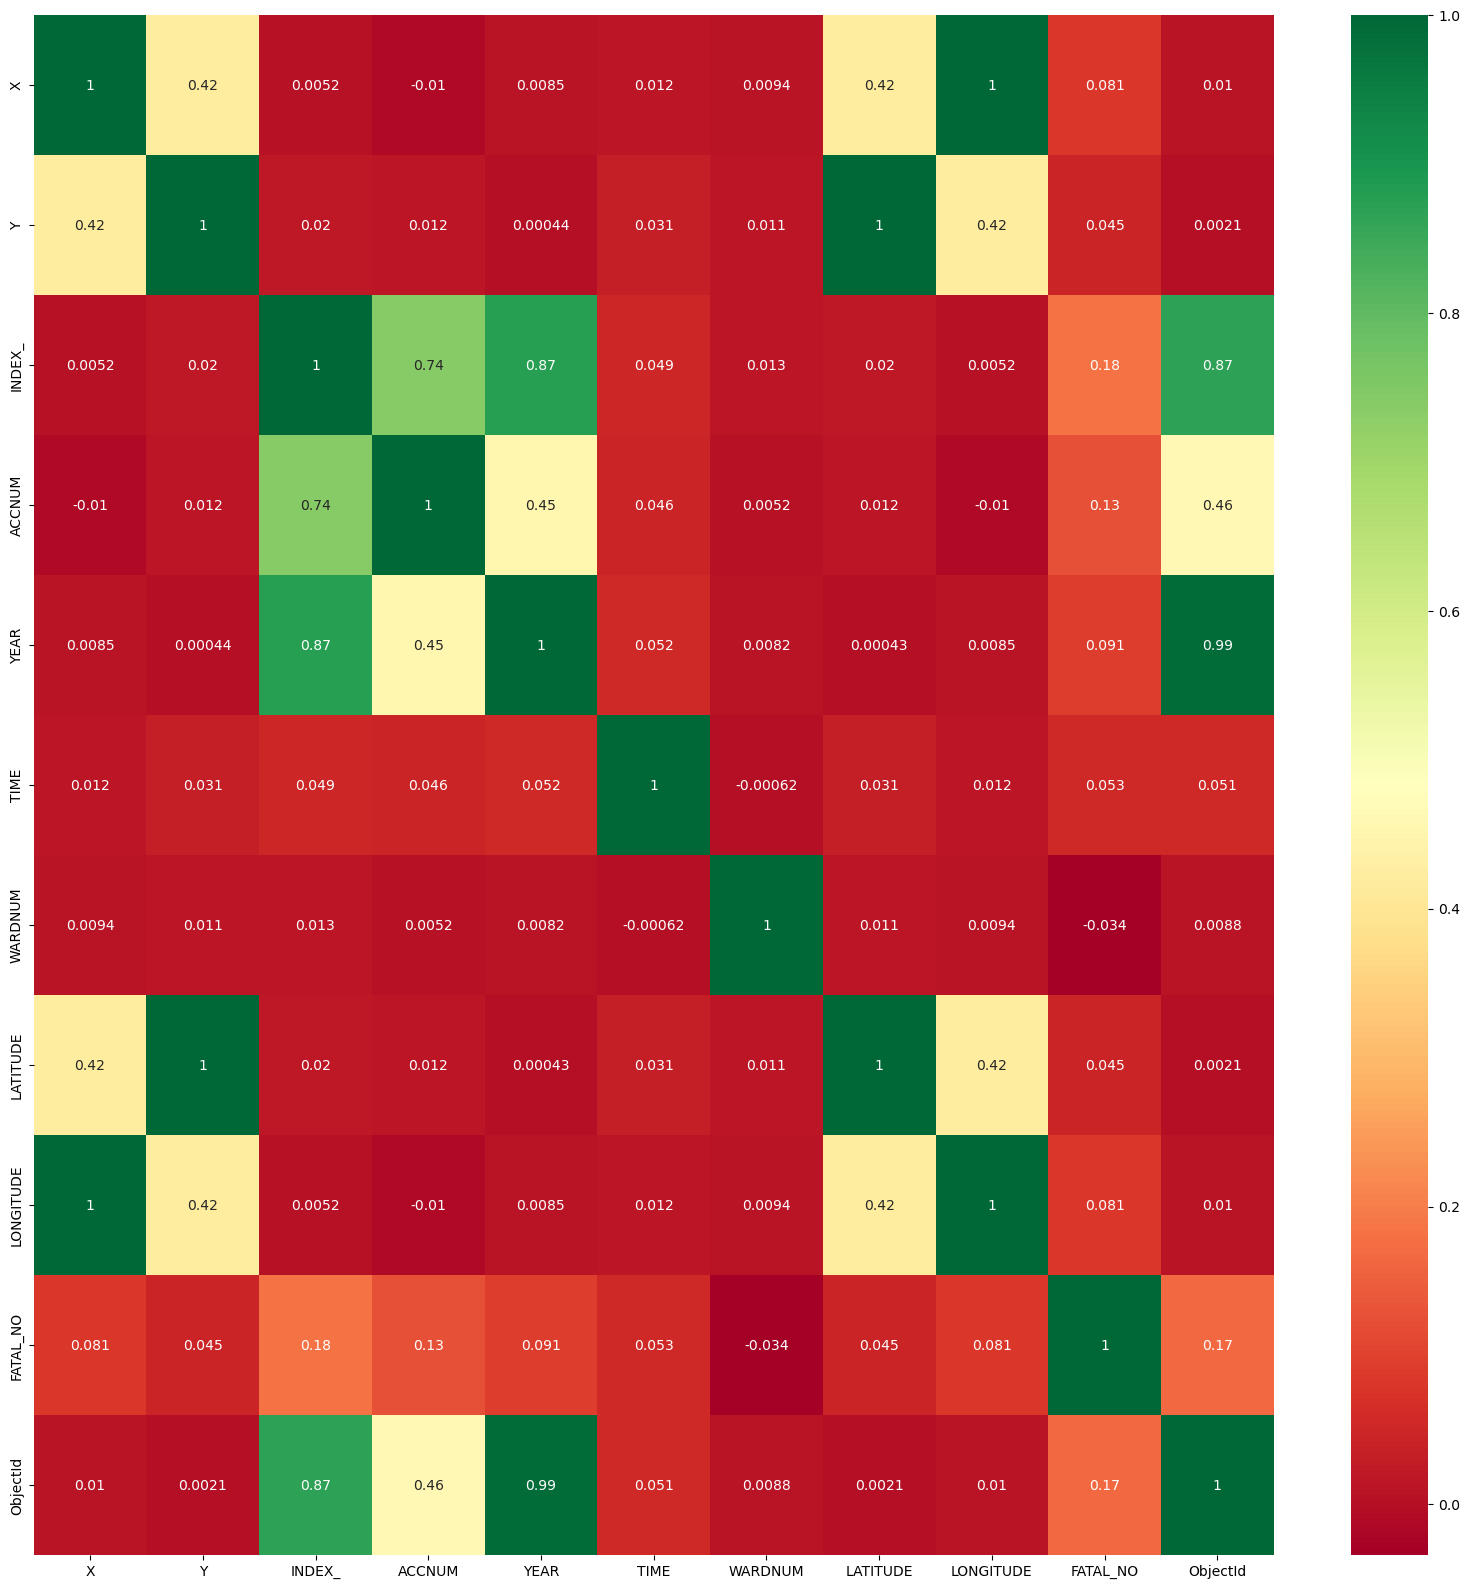

In [7]:
# Plot histogram
df.hist(bins=50, figsize=(20, 20))
plt.show()

# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.show()


In [8]:
# Double check if we need to use these columns to train the model based on the requirement
# yes and no columns
bool_cols = [df.columns[col] for col in range(38, 51)]

# Fill missing values with 'No' in boolean columns
df[bool_cols] = df[bool_cols].fillna('No')

In [9]:
# Drop columns having more than 80% missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percentages[missing_percentages > 80].index
df = df.drop(columns=columns_to_drop)

In [10]:
# From correlation matrix, we can see that 'X' and 'LONGITUDE', 'Y' and 'LATITUDE' are highly correlated.
# So, we will drop x and y columns
columns_to_drop = ['X', 'Y']
df = df.drop(columns=columns_to_drop)

In [11]:
# Drop columns which may not be useful for analysis
# 'ObjectId' and 'INDEX_' are unique identifiers and not useful for analysis
# 'ACCNUM' is also unique identifier and not useful for analysis
# initial direction of vehicle 'INITDIR' is not useful for analysis
# we dont need street names 'STREET1' and 'STREET2' for analysis beacasue we have 'neighbourhood' column
# 'DISTRICT' and 'WARDNUM' are not useful for analysis beacuse we have 'neighbourhood' column
# unique identifier 'DIVISION' is not useful for analysis
# 'HOOD_158' and 'HOOD_140' are not useful for analysis because they are unique identifiers
# 'INJURY' is not useful for analysis because it is the target variable
columns_to_drop = ['ObjectId', 'INDEX_', 'ACCNUM', 'INITDIR', 'STREET1',
                   'STREET2', 'DISTRICT', 'WARDNUM', 'DIVISION', 'HOOD_158', 'HOOD_140', 'INJURY']
# 'INJURY' feature which might be dropped depends on the accuracy score of model
df = df.drop(columns=columns_to_drop)

In [12]:
# In 'NEIGHBOURHOOD_140', the values contain number inside brackets. We can remove the number inside brackets.
df['NEIGHBOURHOOD_140'] = df['NEIGHBOURHOOD_140'].str.replace(r"\(.*\)", "")

In [13]:
# Convert 'property' to 'non fatal'
df['ACCLASS'] = df['ACCLASS'].str.replace(
    "Property Damage Only", "Non-Fatal Injury")

In [14]:
# columns <3% missing values from the categorical, drop it

print(df.shape)

(18194, 35)


In [15]:
# chi square

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot 

In [16]:
# Select categorical columns
cats = df.select_dtypes(include='object')

In [17]:

# Fill missing values in categorical columns with the most frequent value
cats = cats.fillna(cats.mode().iloc[0])
X = cats
# Drop irrelevant columns
X.drop(columns=['DATE', 'ACCLASS'], inplace=True)


In [18]:
# Select target column
y = df['ACCLASS']
y = y.fillna(y.mode().iloc[0])

In [19]:
# Encode categorical features
oe = OrdinalEncoder()
X_enc = oe.fit_transform(X)


In [20]:
nan_values = np.isnan(X_enc)


In [21]:
# Feature selection using chi-squared test
fs = SelectKBest(score_func=chi2, k=10)
X_selected = fs.fit_transform(X_enc, y)


In [22]:
# Get the names of the selected features
selected_feature_indices = fs.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

In [23]:
# Print the scores of each feature
for i, feature_name in zip(range(len(fs.scores_)), X.columns):
    print('Feature {}: {} - Score: {}'.format(i, feature_name, fs.scores_[i]))

Feature 0: ROAD_CLASS - Score: 0.8963829546375985
Feature 1: LOCCOORD - Score: 1.5350009422273985
Feature 2: ACCLOC - Score: 170.86662802463354
Feature 3: TRAFFCTL - Score: 133.43522096731212
Feature 4: VISIBILITY - Score: 22.395428469686227
Feature 5: LIGHT - Score: 44.85873274497915
Feature 6: RDSFCOND - Score: 2.9111081805350016
Feature 7: IMPACTYPE - Score: 18.091668830696975
Feature 8: INVTYPE - Score: 253.3782555761004
Feature 9: INVAGE - Score: 133.72931360282402
Feature 10: VEHTYPE - Score: 84.08509343897191
Feature 11: MANOEUVER - Score: 266.09205824742276
Feature 12: DRIVACT - Score: 4.55575965821865
Feature 13: DRIVCOND - Score: 6.832206373287877
Feature 14: PEDESTRIAN - Score: 102.13746149972884
Feature 15: CYCLIST - Score: 90.28237846835022
Feature 16: AUTOMOBILE - Score: 9.409086251175031
Feature 17: MOTORCYCLE - Score: 0.21482463082478176
Feature 18: TRUCK - Score: 217.9811531212298
Feature 19: TRSN_CITY_VEH - Score: 46.3337628690582
Feature 20: EMERG_VEH - Score: 3.1899

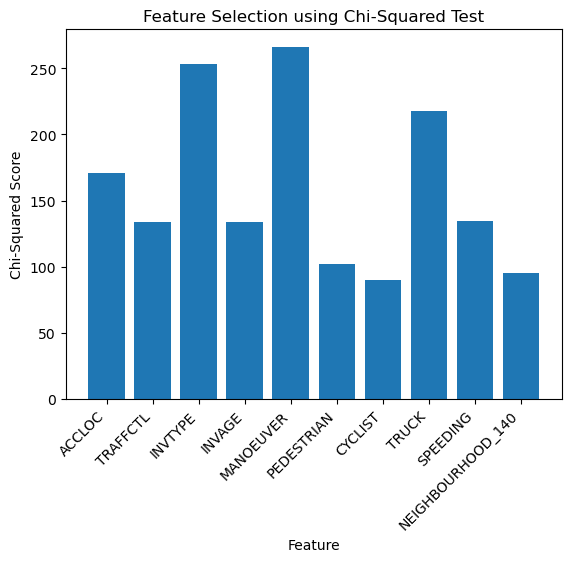

In [24]:
# Plot the scores
plt.bar(selected_feature_names, fs.scores_[selected_feature_indices])
plt.xlabel('Feature')
plt.ylabel('Chi-Squared Score')
plt.title('Feature Selection using Chi-Squared Test')
plt.xticks(rotation=45, ha='right')
plt.show()